# Icing: An Observational Study 🥶

Hypothesis: Icing a kicker prior to an attempty reduces the likelihood of conversion.

## Load & Clean

In [64]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import mysql.connector
import itertools
import dtale
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from datetime import datetime as dt
from util.data import clean, get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
cnx = mysql.connector.connect(user='root', password='mOntie20!mysql', host='127.0.0.1', database='nfl')
df = get_data(cnx, 'g.seas<=2019', xp=False, base='raw_6_cat')
df = clean(df, dropna=False)
df

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
2166,AD-0800,1,38,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.764708,765
2185,AD-0800,1,27,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.807721,766
4565,AD-0800,1,36,2000,17,80,TEN,Adelphia Coliseum,TEN,0,...,1,13,0,0,1,0,0,5,NaN,767
8564,AD-0800,1,24,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.842837,768
8628,AD-0800,1,40,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.871516,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862982,ZG-0050,1,30,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,0,0,0,0,0,0,1,0.826709,62
865338,ZG-0050,1,21,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,11,0,0,0,0,0,2,0.858217,63
868268,ZG-0050,1,22,2019,3,43,SEA,CenturyLink Field,ARI,0,...,1,7,1,0,0,1,0,1,1.000000,64


In [66]:
df.describe()

,good,dist,year,seasons,temperature,XP,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
count,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.0,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18710.000000,18803.000000
mean,0.844865,36.881242,2009.516992,7.913099,60.776153,0.0,29.927139,0.033771,0.352178,6.549593,0.487901,0.040845,0.125033,0.445408,0.080413,1.400202,0.844876,255.230601
std,0.362043,10.070235,5.643918,5.162924,15.706069,0.0,5.250091,0.180645,0.477662,5.986469,0.499867,0.197935,0.330765,0.497024,0.271938,1.024004,0.124109,209.053136
min,0.000000,18.000000,2000.000000,1.000000,-6.000000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,2005.000000,4.000000,51.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.772214,94.000000
50%,1.000000,37.000000,2010.000000,7.000000,64.000000,0.0,29.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.865337,201.000000
75%,1.000000,45.000000,2014.000000,11.000000,70.000000,0.0,33.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.945632,362.000000
max,1.000000,76.000000,2019.000000,26.000000,109.000000,0.0,47.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1033.000000


## Explore

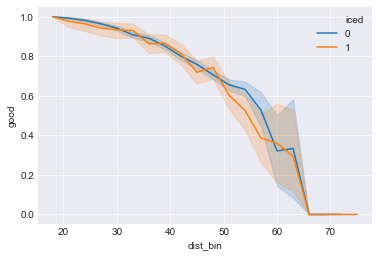

In [67]:
df_ = df.copy()
df_['dist_bin'] = 3*round(df_['dist']/3)
sns.lineplot(x='dist_bin', y='good', hue='iced', data=df_)

## Matching

* Mahanalobis distance with radius matching

In [68]:
df_long = df[df['dist']>=45].drop(['fkicker', 'home_team', 'stadium', 'team', 'XP'], axis=1)
df_long['form'] = df_long['form'].fillna(method='bfill')
df_long.dropna(inplace=True)
print(df_long['iced'].value_counts())
df_long

0    4220
1     817
Name: iced, dtype: int64


,good,dist,year,seasons,temperature,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,
11064,0,46,2000,17,72,38,0,1,5,0,0,1,0,0,1,1.000000,771
20774,1,46,2000,17,54,38,0,0,9,1,0,0,0,0,1,0.710344,779
32219,1,50,2000,17,30,38,0,0,7,1,0,1,1,0,6,0.961555,795
479437,0,63,2011,1,61,24,0,0,0,1,0,0,1,0,1,0.605990,2
495847,1,47,2011,1,51,24,0,1,2,0,0,0,0,0,1,0.725456,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838716,0,48,2019,3,66,24,0,0,0,0,0,0,0,0,1,0.835520,44
844674,1,47,2019,3,56,24,0,1,3,1,0,0,1,1,1,0.813096,52
846996,1,50,2019,3,70,24,0,0,0,1,0,0,1,0,1,0.771461,56


In [69]:
from util.matching import search_radii, match_frame
from scipy.stats import mannwhitneyu

df_long['iced'] = df_long['iced'].astype(bool)
radii = np.arange(0,4,0.1)
covariate_stats = search_radii(df_long, on='iced', dv='good', distance='mahalanobis', method='with_replacement', radii=radii, cont_test=mannwhitneyu)

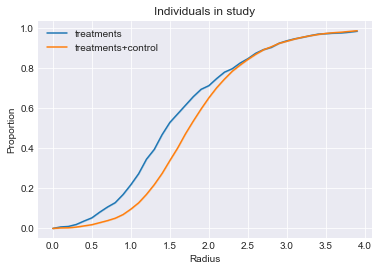

In [70]:
cd_norm = covariate_stats.copy()
cd_norm['treatments'] = cd_norm['treatments']/df_long['iced'].sum()
cd_norm['samples'] = cd_norm['samples']/len(df_long)

sns.lineplot(x='radius', y='treatments', label='treatments', data=cd_norm)
sns.lineplot(x='radius', y='samples', label='treatments+control', data=cd_norm)
plt.title('Individuals in study')
plt.ylabel('Proportion')
plt.xlabel('Radius')
plt.legend()

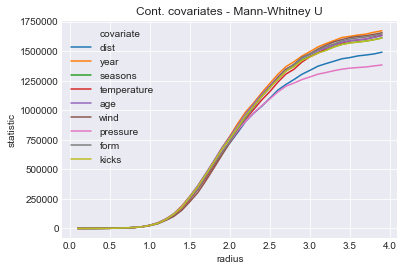

Text(0.5, 1.0, 'Binary covariates Z-score')

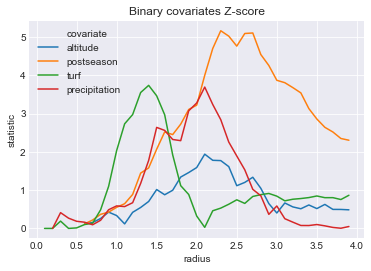

In [71]:
cont = ['dist','year','seasons','temperature','age','wind','pressure','form','kicks']
binary = ['postseason','altitude','turf','precipitation']
sns.lineplot(x='radius', y='statistic', hue='covariate', data=covariate_stats.loc[covariate_stats['covariate'].isin(cont),:])
plt.title('Cont. covariates - Mann-Whitney U')
plt.show()
covariate_stats['statistic'] = covariate_stats['statistic'].abs()
sns.lineplot(x='radius', y='statistic', hue='covariate', data=covariate_stats.loc[covariate_stats['covariate'].isin(binary),:])
plt.title('Binary covariates Z-score')

In [72]:
df_matched = match_frame(df_long, 'iced', 'good', 'mahalanobis', 'with_replacement', 1.5)

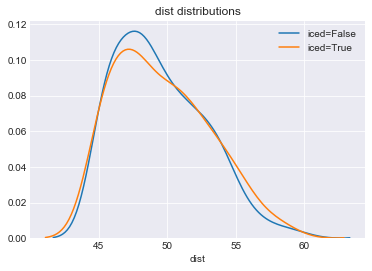

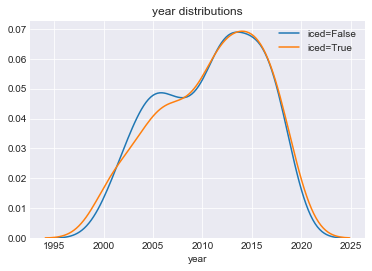

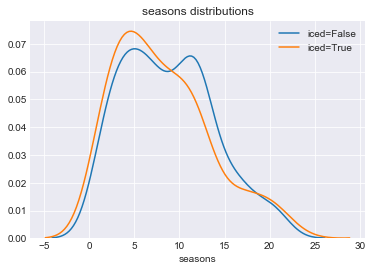

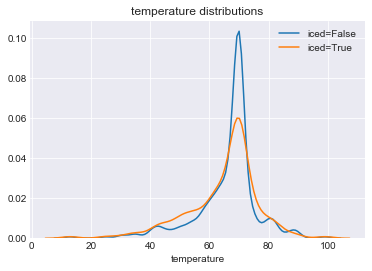

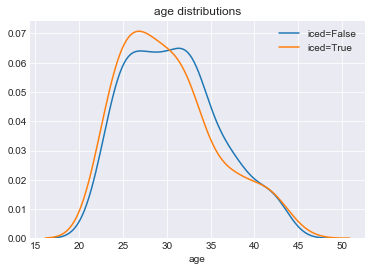

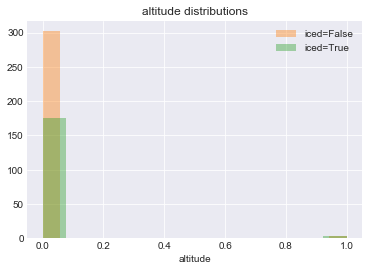

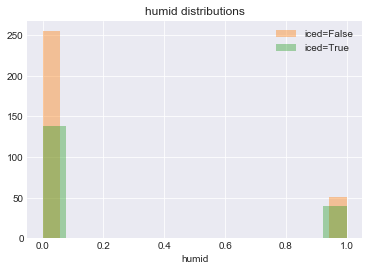

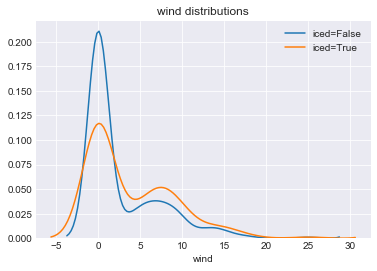

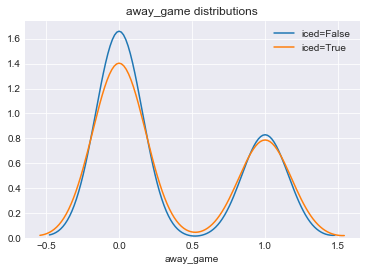

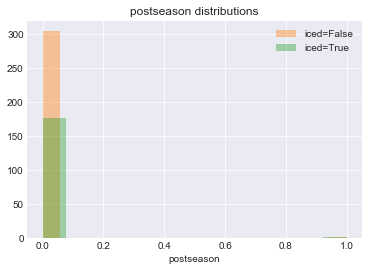

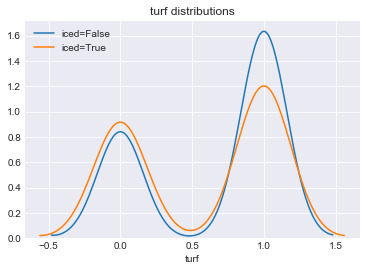

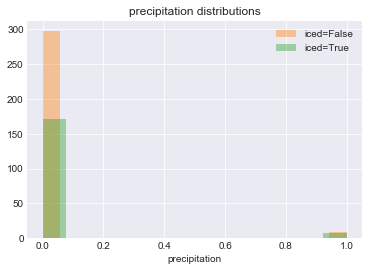

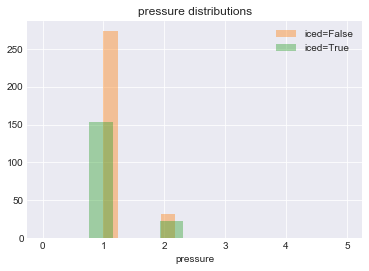

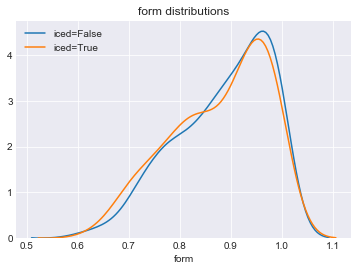

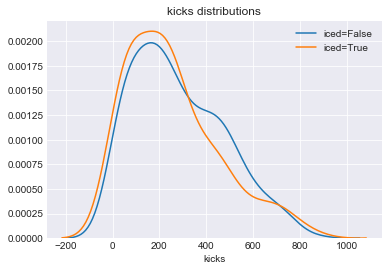

In [63]:
from util.matching import covariate_dists

covariate_dists(df_matched.drop('good', axis=1), on='iced')

In [73]:
from util.matching import dist_test, binom_z_tests
mw = dist_test(df_matched.drop('good', axis=1), on='iced', func=mannwhitneyu)
mw

,statistic,p-value
dist,263898.5,1.042098e-01
year,271698.0,3.555729e-01
seasons,265352.0,1.378476e-01
temperature,244870.5,2.895779e-04
age,270530.5,3.075451e-01
altitude,NaN,NaN
humid,NaN,NaN
wind,225412.5,1.129430e-09
away_game,NaN,NaN
postseason,NaN,NaN


In [74]:
df_ice = df_matched.loc[df_matched['iced']==1, :]
df_noice = df_matched.loc[df_matched['iced']==0, :]
print(len(df_ice), 'iced samples.', len(df_noice), 'not-iced samples.')

432 iced samples. 1273 not-iced samples.


## Model

We work within a Bayesian framework, setting a prior distribution on the true population proportion and update the prior after our observations. The Beta-Binomial conjugacy makes this process relatively pain-free.

In [50]:
from scipy.stats import beta
p_hat = df[df['dist']>=40]['good'].mean()
alpha_ = 12
beta_ = int(round(alpha_*(1-p_hat)/p_hat))
print(f'alpha: {alpha_}, beta: {beta_}')

alpha: 12, beta: 5


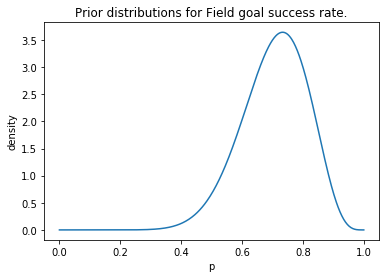

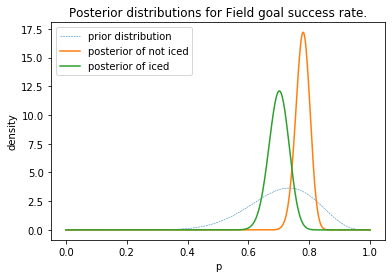

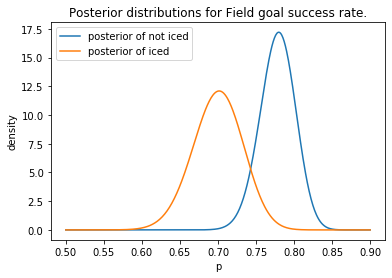

In [51]:
from util.bayes import BetaBinomial

control = BetaBinomial(alpha_, beta_, 'not iced')
treatment = BetaBinomial(alpha_, beta_, 'iced')
control.plot_prior(show=True)
plt.cla()

control.observe(df_noice['good'])
treatment.observe(df_ice['good'])

control.plot_posterior(prior=True)
treatment.plot_posterior(show=True, prior=False)

# zoom in
x = np.linspace(0.5,0.9,500)
control.plot_posterior(x, prior=False, show=False)
treatment.plot_posterior(x, prior=False, show=True)

samples = 20000
samples_posterior_noice = control.sample(samples)
samples_posterior_ice = treatment.sample(samples)

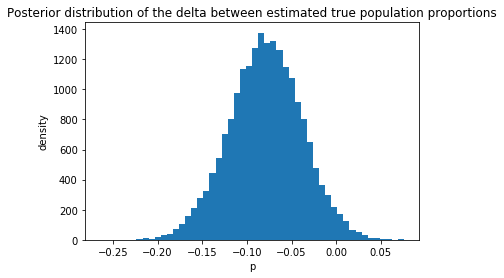

97 % likely that iced has a lower true population proportion of converted field goals.
-0.08 is the median difference, with 50% credible interval of (0.0,-0.16).


In [52]:
posterior_diff = samples_posterior_ice - samples_posterior_noice

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions')
plt.show()
print(int((samples_posterior_ice<samples_posterior_noice).mean()*100), r'% likely that iced has a lower true population proportion of converted field goals.')

from scipy.stats import bayes_mvs
alpha = 0.5
center, _, _ = bayes_mvs(posterior_diff, alpha=alpha)
print(f'{round(center.statistic,2)} is the median difference, with {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

96 % likely relative lift less than -1%.
-0.1 is the median relative lift, with 50 credible interval of (0.0,-0.2).


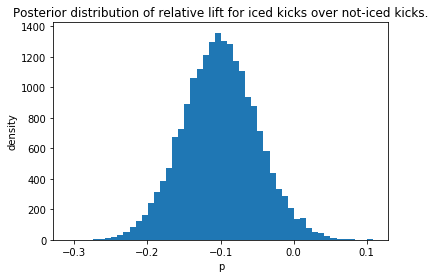

In [53]:
posterior_relative = (samples_posterior_ice-samples_posterior_noice)/samples_posterior_noice
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for iced kicks over not-iced kicks.')
print(int((posterior_relative<-0.01).mean()*100), r'% likely relative lift less than -1%.')

center, _, _ = bayes_mvs(posterior_relative, alpha=alpha)
print(f'{round(center.statistic,2)} is the median relative lift, with {int(alpha*100)} credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')